In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import random

# 1) Создание таблицы с приближенными значениями производной функции 𝑓′(𝑥), используя формулы первого порядка точности.

In [2]:
x = sp.symbols("x")

In [3]:
f = 8 * sp.exp(-x) ** (1 / 4) * sp.cos(x / 16) + 8 * sp.pi
f

8*exp(-x)**0.25*cos(x/16) + 8*pi

In [4]:
a = 0
b = 1
N = 10

In [5]:
x_num = list()
x_num.append(a)
for i in range(1, N):
    x_num.append(x_num[i - 1] + 1 / 10)
x_num.append(b)
x_num

[0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.8999999999999999,
 1]

In [6]:
df_alg = list()
for i in range(N):
    tmp = (f.subs({x:x_num[i + 1]}) - f.subs({x:x_num[i]}))/(x_num[i+1] - x_num[i])
    df_alg.append(sp.N(tmp))
df_alg

[-1.97673095451027,
 -1.93086019192489,
 -1.88597595784304,
 -1.84205921014675,
 -1.79909120877384,
 -1.75705351312429,
 -1.71592797939923,
 -1.67569675787759,
 -1.63634229013484,
 -1.59784730620897]

In [7]:
df = sp.diff(f, x)
for i in range(N):
    print(np.abs(df_alg[i] - df.subs({x:x_num[i]})) < (x_num[i+1] - x_num[i]) , end = "\n")

True
True
True
True
True
True
True
True
True
True


# 2) Создание таблицs с приближенными значениями первой производной функции 𝑓′(𝑥), используя формулы второго порядка точности.

In [22]:
x = sp.symbols("x")

In [23]:
f = 8 * sp.exp(-x) ** (1 / 4) * sp.cos(x / 16) + 8 * sp.pi
f

8*exp(-x)**0.25*cos(x/16) + 8*pi

In [24]:
a = 0
b = 1
N = 10

In [30]:
x_num = list()
x_num.append(a)
for i in range(1, N):
    x_num.append(x_num[i - 1] + 1 / 10)
x_num.append(b)
x_num

[0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.8999999999999999,
 1]

In [31]:
df_alg = list()
for i in range(1, N):
    tmp = (f.subs({x:x_num[i + 1]}) - f.subs({x:x_num[i - 1]}))/((x_num[i + 1] - x_num[i - 1]))
    df_alg.append(sp.N(tmp))
df_alg

[-1.95379557321758,
 -1.90841807488397,
 -1.86401758399489,
 -1.82057520946029,
 -1.77807236094906,
 -1.73649074626176,
 -1.69581236863841,
 -1.65601952400622,
 -1.61709479817190]

In [37]:
df = sp.diff(f, x)
for i in range(1, N - 1):
    print(np.abs(df_alg[i - 1] - df.subs({x:x_num[i]})) < ((x_num[i + 1] - x_num[i]) ** 2) , end = "\n")

True
True
True
True
True
True
True
True


# 3) Создание таблицы приближенных значений производных функции 𝑓′′(𝑥), вычисляемых по формулам второго порядка точности.

In [38]:
x = sp.symbols("x")

In [39]:
f = 8 * sp.exp(-x) ** (1 / 4) * sp.cos(x / 16) + 8 * sp.pi
f

8*exp(-x)**0.25*cos(x/16) + 8*pi

In [40]:
a = 0
b = 1
N = 10

In [41]:
x_num = list()
x_num.append(a)
for i in range(1, N):
    x_num.append(x_num[i - 1] + 1 / 10)
x_num.append(b)
x_num

[0,
 0.1,
 0.2,
 0.30000000000000004,
 0.4,
 0.5,
 0.6,
 0.7,
 0.7999999999999999,
 0.8999999999999999,
 1]

In [47]:
df_alg = list()
for i in range(1, N):
    h = x_num[i + 1] - x_num[i]
    tmp = (f.subs({x:x_num[i - 1]}) - 2*f.subs({x:x_num[i]}) + f.subs({x:x_num[i + 1]}))/(h ** 2)
    df_alg.append(sp.N(tmp))
df_alg

[0.458707625853716,
 0.448842340818522,
 0.439167476962954,
 0.429680013729073,
 0.420376956495528,
 0.411255337250527,
 0.402312215216405,
 0.393544677427560,
 0.384949839258617]

In [48]:
df = sp.diff(f, x)
d2f = sp.diff(df, x)
for i in range(1, N - 1):
    print(np.abs(df_alg[i] - d2f.subs({x:x_num[i]})) < ((x_num[i] - x_num[i - 1]) ** 2) , end = "\n")

True
True
True
True
True
True
True
True


# 4) Производные первого и второго порядков, используя интерполяционный метод.

In [249]:
x = sp.symbols("x")

In [250]:
f = 8 * sp.exp(-x) ** (1 / 4) * sp.cos(x / 16) + 8 * sp.pi
f

8*exp(-x)**0.25*cos(x/16) + 8*pi

In [251]:
a = -5
b = 5
N = 10

In [252]:
x_num = list()
#x_num.append(a)
for i in range(N):
    x_num.append(random.randint(a*100, b*100)/100)
#x_num.append(b)
x_num.sort()
x_num

[-4.95, -4.73, -3.49, -2.69, 0.42, 1.57, 1.72, 2.4, 2.87, 4.98]

In [253]:
h_list = list()
for i in range(1, N):
    h_list.append((x_num[i] - x_num[i - 1]))
h_list

[0.21999999999999975,
 1.2400000000000002,
 0.8000000000000003,
 3.11,
 1.1500000000000001,
 0.1499999999999999,
 0.6799999999999999,
 0.4700000000000002,
 2.1100000000000003]

In [254]:
df_alg = np.array([f.subs({x : x_num[i - 1]}) * (2 * x - x_num[i] - x_num[i + 1]) / (x_num[i] - x_num[i - 1]) / (x_num[i + 1] - x_num[i - 1]) 
- f.subs({x : x_num[i]}) * (2 * x - x_num[i - 1] - x_num[i + 1]) / (x_num[i + 1] - x_num[i]) / (x_num[i] - x_num[i - 1]) 
+ f.subs({x : x_num[i + 1]}) * (2 * x - x_num[i - 1] - x_num[i]) / (x_num[i + 1] - x_num[i - 1]) / (x_num[i + 1] - x_num[i]) for i in range(1, N - 1)])
df_alg

array([3.11332503113325*(8*pi + 26.2666904596273)*(2*x + 8.22) - 3.66568914956012*(24.9679438273044 + 8*pi)*(2*x + 8.44) + 0.552364118426867*(18.6894877315514 + 8*pi)*(2*x + 9.68),
       0.395319418089816*(24.9679438273044 + 8*pi)*(2*x + 6.18) - 1.00806451612903*(18.6894877315514 + 8*pi)*(2*x + 7.42) + 0.612745098039215*(15.4520463904046 + 8*pi)*(2*x + 8.22),
       0.319693094629156*(18.6894877315514 + 8*pi)*(2*x + 2.27) - 0.401929260450161*(15.4520463904046 + 8*pi)*(2*x + 3.07) + 0.0822361658210048*(7.20011480371497 + 8*pi)*(2*x + 6.18),
       0.0754796733239739*(15.4520463904046 + 8*pi)*(2*x - 1.99) - 0.279602963791416*(7.20011480371497 + 8*pi)*(2*x + 1.12) + 0.204123290467442*(5.37694053314112 + 8*pi)*(2*x + 2.27),
       0.668896321070234*(7.20011480371497 + 8*pi)*(2*x - 3.29) - 5.79710144927536*(5.37694053314112 + 8*pi)*(2*x - 2.14) + 5.12820512820513*(5.17403192155784 + 8*pi)*(2*x - 1.99),
       8.03212851405623*(5.37694053314112 + 8*pi)*(2*x - 4.12) - 9.80392156862746*(5.174

In [255]:
d2f_alg = list()
for i in range(1, N - 3):
    h_ = (h_list[i + 1] + h_list[i]) / 2
    tmp = (1/h_ * ((f.subs({x:x_num[i + 1]}) - f.subs({x:x_num[i]}))/h_list[i + 1] - ((f.subs({x:x_num[i]}) - f.subs({x:x_num[i - 1]}))/h_list[i])))
    d2f_alg.append(sp.N(tmp))
d2f_alg

[-6.66734686598200,
 3.48188859155643,
 -2.88010082670405,
 -7.65984992781700,
 28.5689159521079,
 -2.56278882336904]

In [258]:
df = sp.diff(f, x)
d2f = sp.diff(df, x)
for i in range(1, N - 2):
    print(sp.N(df_alg[i-1].subs({x:x_num[i]})), df.subs({x:x_num[i]}), np.abs(df_alg[i-1].subs({x:x_num[i]}) - df.subs({x:x_num[i]})) < ((x_num[i] - x_num[i - 1])) , end = "\n")
    

-5.77679994600473 -5.76673821979663 True
-4.44541711507214 -4.41346238999124 True
-3.76169733505352 -3.69909706972178 True
-1.87367481557129 -1.81184410325349 True
-1.37956771418860 -1.37731714651005 True
-1.32959871356435 -1.32840553934759 True
-1.12968039938362 -1.12630483899790 True


# 5) Вычисление производных первого и второго порядков при помощи сплайнов.

In [19]:
x = sp.symbols("x")

In [20]:
f = 8 * sp.exp(-x) ** (1 / 4) * sp.cos(x / 16) + 8 * sp.pi
f

8*exp(-x)**0.25*cos(x/16) + 8*pi

In [21]:
a = 0
b = 1
N = 10

In [22]:
x_numbers = list()
x_numbers.append(0)
for i in range(1, N):
    x_numbers.append(x_numbers[i - 1] + 1 /10)
x_numbers.append(b)
x_numbers.pop(0)
n = len(x_numbers)
n, x_numbers

(10,
 [0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6,
  0.7,
  0.7999999999999999,
  0.8999999999999999,
  1])

In [23]:
M_num = list()
for i in range(n):
    i = sp.symbols("M" + str(i))
    M_num.append(i)
M_num

[M0, M1, M2, M3, M4, M5, M6, M7, M8, M9]

In [24]:
df1 = sp.diff(f, x)
df2 = sp.diff(df1, x)

In [25]:
y_numbers = [sp.N(f.subs({x:x_numbers[i]})) for i in range(n)]
y_numbers

[32.9350681332673,
 32.7419821140748,
 32.5533845182905,
 32.3691785972758,
 32.1892694763985,
 32.0135641250860,
 31.8419713271461,
 31.6744016513584,
 31.5107674223449,
 31.3509826917240]

In [26]:
solution = list()
h = 0
for i in range(1, n - 1):
    h = x_numbers[i + 1] - x_numbers[i]
    h_ = x_numbers[i] - x_numbers[i - 1]
    solution.append((M_num[i-1] * h_) / 6 + (M_num[i] * (h_ + h)) / 3 + (M_num[i + 1] * h) / 6 - 
                    (y_numbers[i + 1] - y_numbers[i]) / h + (y_numbers[i] - y_numbers[i - 1]) / h_)
solution.append(M_num[0] - df2.subs({x:x_numbers[0]}))
solution.append(M_num[n - 1] - df2.subs({x:x_numbers[n - 1]}))
sol = sp.solve(solution, *[M_num[i] for i in range(n)])
sol

{M0: 0.458691503879615,
 M1: 0.448806285166790,
 M2: 0.439137400367595,
 M3: 0.429648975135686,
 M4: 0.420346781467823,
 M5: 0.411225637964587,
 M6: 0.402282690180716,
 M7: 0.393516892607780,
 M8: 0.384917803952988,
 M9: 0.376510927134424}

In [27]:
global s3
s3 = list()
h = 0
for i in range(n - 1):
    h = x_numbers[i + 1] - x_numbers[i]
    s3.append((- M_num[i] / (6 *h) * (x - x_numbers[i + 1]) ** 3 + M_num[i + 1] / (6 *h) * (x - x_numbers[i]) ** 3 + ((f.subs({x:x_numbers[i+1]}) - f.subs({x:x_numbers[i]})) / h - h/6 * (M_num[i + 1] - M_num[i])) * (x - x_numbers[i]) + f.subs({x:x_numbers[i]}) - M_num[i] * h * h /6).subs(sol))
s3

[-1.93069543827968*x - 0.764485839799358*(x - 0.2)**3 + 0.748010475277984*(x - 0.1)**3 + 7.99463196253714 + 8*pi,
 -1.88581480976306*x - 0.748010475277984*(x - 0.3)**3 + 0.731895667279325*(x - 0.2)**3 + 7.98565583683382 + 8*pi,
 -1.84190106972622*x - 0.731895667279326*(x - 0.4)**3 + 0.716081625226144*(x - 0.3)**3 + 7.97248171482277 + 8*pi,
 -1.79893617221271*x - 0.716081625226144*(x - 0.5)**3 + 0.700577969113039*(x - 0.4)**3 + 7.95529575581736 + 8*pi,
 -1.7569014940659*x - 0.700577969113039*(x - 0.6)**3 + 0.685376063274312*(x - 0.5)**3 + 7.93427841674396 + 8*pi,
 -1.7157789302695*x - 0.685376063274312*(x - 0.7)**3 + 0.670471150301194*(x - 0.6)**3 + 7.90960487846612 + 8*pi,
 -1.67555066125138*x - 0.670471150301194*(x - 0.8)**3 + 0.655861487679634*(x - 0.7)**3 + 7.88144509015343 + 8*pi,
 -1.63619897199059*x - 0.655861487679634*(x - 0.9)**3 + 0.64152967325498*(x - 0.8)**3 + 7.8499637387448 + 8*pi,
 -0.641529673254979*(x - 1)**3 + 0.627518211890706*(x - 0.9)**3 + (-63.7801218216516 + 62.30

In [28]:
s3 = [sp.diff(s3[i], x) for i in range(len(s3))]
s3

[-2.29345751939807*(x - 0.2)**2 + 2.24403142583395*(x - 0.1)**2 - 1.93069543827968,
 -2.24403142583395*(x - 0.3)**2 + 2.19568700183798*(x - 0.2)**2 - 1.88581480976306,
 -2.19568700183798*(x - 0.4)**2 + 2.14824487567843*(x - 0.3)**2 - 1.84190106972622,
 -2.14824487567843*(x - 0.5)**2 + 2.10173390733912*(x - 0.4)**2 - 1.79893617221271,
 -2.10173390733912*(x - 0.6)**2 + 2.05612818982294*(x - 0.5)**2 - 1.7569014940659,
 -2.05612818982294*(x - 0.7)**2 + 2.01141345090358*(x - 0.6)**2 - 1.7157789302695,
 -2.01141345090358*(x - 0.8)**2 + 1.9675844630389*(x - 0.7)**2 - 1.67555066125138,
 -1.9675844630389*(x - 0.9)**2 + 1.92458901976494*(x - 0.8)**2 - 1.63619897199059,
 -1.92458901976494*(x - 1)**2 + 1.88255463567212*(x - 0.9)**2 - 63.7801218216516 + 62.3040626457123*cos(1/16)]

In [29]:
def s(num):
    for i in range(n - 1):
        if x_numbers[i] < num < x_numbers[i+1]:
            return s3[i].subs({x:num})

In [30]:
f = 8 * sp.exp(-x) ** (1 / 4) * sp.cos(x / 16) + 8 * sp.pi
df1 = sp.diff(f, x)
f1 = sp.lambdify(x, df1)
f2 = np.vectorize(s)

In [31]:
t = np.arange(x_numbers[0], x_numbers[n - 1], 0.01)

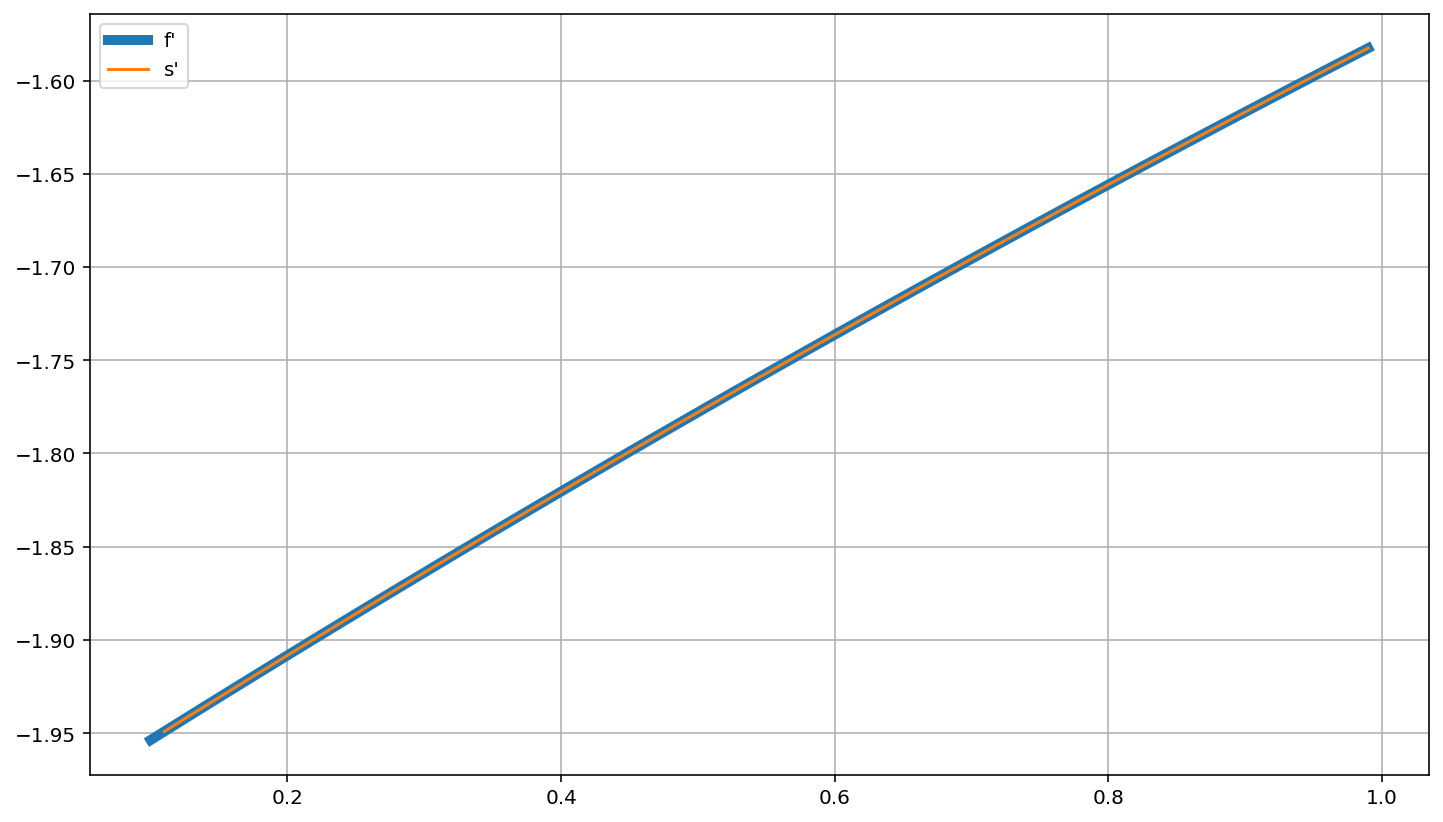

In [32]:
plt.plot(t, f1(t), label = "f'", linewidth=5.0)
plt.plot(t, f2(t), label = "s'")
plt.grid()
plt.legend()
plt.show()

In [33]:
df2 = sp.diff(df1, x)
f3 = sp.lambdify(x, df2)
s3 = [sp.diff(s3[i], x) for i in range(len(s3))]
f4 = np.vectorize(s)

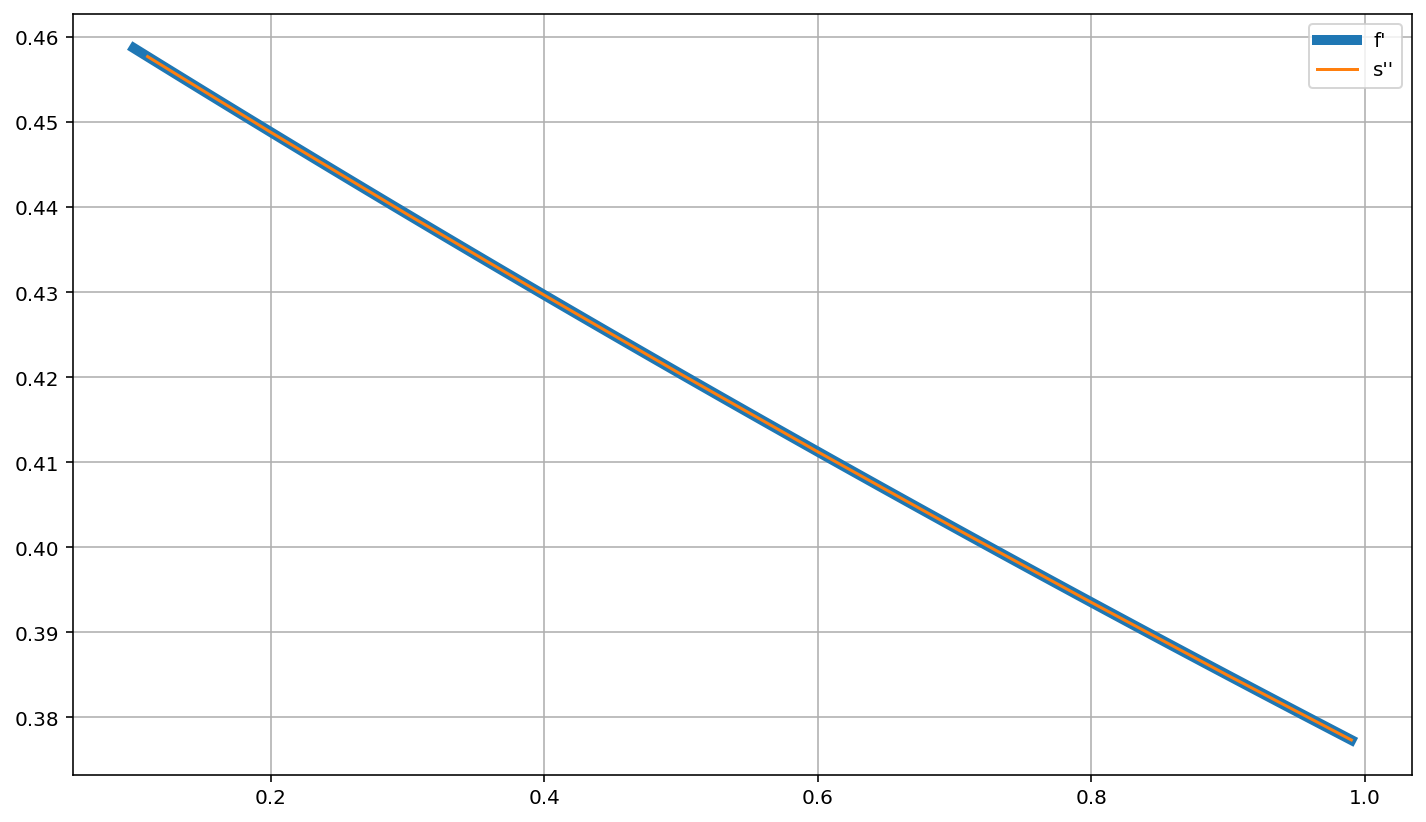

In [35]:
plt.plot(t, f3(t), label = "f'", linewidth=5.0)
plt.plot(t, f4(t), label = "s''")
plt.grid()
plt.legend()
plt.show()